<a href="https://colab.research.google.com/github/RitikaTholia/Cardiovascular-disease-prediction-model/blob/main/Cardiovascular_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Heart Disease Prediction





*   Importing libraries
*   Importing the dataset
*   Dataset information (Pandas Profiling)
*   Spliting the Train & Test datasets
*   Feature Scaling and Feature Selection


```
# Random Forest Classifier  Model

1.   Importing the libraries
2.   Testing and training data
3.   Decision Tree
4.   Confusion matrix
5.   Sensitivity and specificity
6.   ROC(Receiver Operator Curve) and accuracy
```

```
# Logistic Regression  

1.   Importing the libraries
2.   Training data
3.   Prediction
4.   Confusion matrix
5.   Sensitivity and specificity
6.   ROC, Accuracy and AUC(area under curve)

```

```
# KNN

1.   Importing libraries
2.   Importing the dataset
3.   Feature Selection
4.   Data processing
5.   ROC and score


```



```
# ANN

1.   Building the ANN
2.   Adding the input layer and the first hidden layer
     Adding the second hidden layer
     Adding the output layer
3.   Training the ANN on the Training set
4.   Making the predictions and evaluating the model
5.   Confusion matrix and accuracy
6.   Sensitivity and specificity
```

*    Testing the model

Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns #for plotting
from sklearn.ensemble import RandomForestClassifier #for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.model_selection import train_test_split #for data splitting

In [ ]:
tf.__version__

'2.17.0'

##Random Forest Classifier Algorithm Model
Part 1 - Data Preprocessing

Importing the dataset

In [ ]:
dataset = pd.read_csv('/content/heart_disease_data.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
dataset.head(10)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   
5   57    1   0       140   192    0        1      148      0      0.4      1   
6   56    0   1       140   294    0        0      153      0      1.3      1   
7   44    1   1       120   263    0        1      173      0      0.0      2   
8   52    1   2       172   199    1        1      162      0      0.5      2   
9   57    1   2       150   168    0        1      174      0      1.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
5   0     1       1  
6   0     2       1  
7   0     3       1  
8   0     3       1  
9   0     2       1

The above set of data is transparent and self-explanatory. Yet, the interpretation of few of the column headers is not obvious. Here's what they mean,

**age:** The age of person in years


**cp:** The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

**chol:** The person's cholesterol measurement in mg/dl

**fbs:** The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

**restecg:** Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

**thalach:** The person's maximum heart rate achieved

**exang:** Exercise induced angina (1 = yes; 0 = no)

**oldpeak:** ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

**slope:** the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

**ca:** The number of major vessels (0-3)

**thal:** A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

**target:** Heart disease (0 = no, 1 = yes)

***Diagnosis:*** The diagnosis of heart disease is done on a combination of clinical signs and test results. The types of tests run will be chosen on the basis of what the physician thinks is going on 1, ranging from electrocardiograms and cardiac computerized tomography (CT) scans, to blood tests and exercise stress tests 2.

Looking at information of heart disease risk factors led me to the following: *high cholesterol, high blood pressure, diabetes, weight, family history and smoking* . According to another source , the major factors that can't be changed are: *increasing age, male gender and heredity. Note that thalassemia, one of the variables in this dataset, is heredity*. Major factors that can be modified are: *Smoking, high cholesterol, high blood pressure, physical inactivity, and being overweight and having diabetes*. Other factors include *stress, alcohol and poor diet/nutrition*.

I can see no reference to the 'number of major vessels', but given that the definition of heart disease is "**...what happens when your heart's blood supply is blocked or interrupted by a build-up of fatty substances in the coronary arteries"**, it seems logical the more major vessels is a good thing, and therefore will reduce the probability of heart disease.

Given the above, I would hypothesis that, if the model has some predictive ability, we'll see these factors standing out as the most important.

Let's change the column names to be a bit clearer,

In [ ]:
dataset.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

Now, I am revising the values of categorical variables, for clearer and easy understability

In [ ]:
dataset['sex'][dataset['sex'] == 0] = 'female'
dataset['sex'][dataset['sex'] == 1] = 'male'

dataset['chest_pain_type'][dataset['chest_pain_type'] == 0] = 'typical angina'
dataset['chest_pain_type'][dataset['chest_pain_type'] == 1] = 'atypical angina'
dataset['chest_pain_type'][dataset['chest_pain_type'] == 2] = 'non-anginal pain'
dataset['chest_pain_type'][dataset['chest_pain_type'] == 3] = 'asymptomatic'

dataset['fasting_blood_sugar'][dataset['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
dataset['fasting_blood_sugar'][dataset['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

dataset['rest_ecg'][dataset['rest_ecg'] == 0] = 'normal'
dataset['rest_ecg'][dataset['rest_ecg'] == 1] = 'ST-T wave abnormality'
dataset['rest_ecg'][dataset['rest_ecg'] == 2] = 'left ventricular hypertrophy'

dataset['exercise_induced_angina'][dataset['exercise_induced_angina'] == 0] = 'no'
dataset['exercise_induced_angina'][dataset['exercise_induced_angina'] == 1] = 'yes'

dataset['st_slope'][dataset['st_slope'] == 0] = 'upsloping'
dataset['st_slope'][dataset['st_slope'] == 1] = 'flat'
dataset['st_slope'][dataset['st_slope'] == 2] = 'downsloping'

dataset['thalassemia'][dataset['thalassemia'] == 1] = 'normal'
dataset['thalassemia'][dataset['thalassemia'] == 2] = 'fixed defect'
dataset['thalassemia'][dataset['thalassemia'] == 3] = 'reversable defect'


Review the datatypes,

In [ ]:
dataset.dtypes

age                          int64
sex                         object
chest_pain_type             object
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar         object
rest_ecg                    object
max_heart_rate_achieved      int64
exercise_induced_angina     object
st_depression              float64
st_slope                    object
num_major_vessels            int64
thalassemia                 object
target                       int64
dtype: object

Some of those aren't quite right. The code below changes them into categorical variables,

In [ ]:
dataset['sex'] = dataset['sex'].astype('object')
dataset['chest_pain_type'] = dataset['chest_pain_type'].astype('object')
dataset['fasting_blood_sugar'] = dataset['fasting_blood_sugar'].astype('object')
dataset['rest_ecg'] = dataset['rest_ecg'].astype('object')
dataset['exercise_induced_angina'] = dataset['exercise_induced_angina'].astype('object')
dataset['st_slope'] = dataset['st_slope'].astype('object')
dataset['thalassemia'] = dataset['thalassemia'].astype('object')

In [ ]:
dataset.dtypes

age                          int64
sex                         object
chest_pain_type             object
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar         object
rest_ecg                    object
max_heart_rate_achieved      int64
exercise_induced_angina     object
st_depression              float64
st_slope                    object
num_major_vessels            int64
thalassemia                 object
target                       int64
dtype: object

For the categorical varibles, we need to create dummy variables. I'm also going to drop the first category of each. For example, rather than having 'male' and 'female', we'll have 'male' with values of 0 or 1 (1 being male, and 0 therefore being female).

In [ ]:
dataset = pd.get_dummies(dataset, drop_first=True)

Now, lets see

In [ ]:
dataset.head()

age  resting_blood_pressure  cholesterol  max_heart_rate_achieved  \
0   63                     145          233                      150   
1   37                     130          250                      187   
2   41                     130          204                      172   
3   56                     120          236                      178   
4   57                     120          354                      163   

   st_depression  num_major_vessels  target  sex_male  \
0            2.3                  0       1      True   
1            3.5                  0       1      True   
2            1.4                  0       1     False   
3            0.8                  0       1      True   
4            0.6                  0       1     False   

   chest_pain_type_atypical angina  chest_pain_type_non-anginal pain  \
0                            False                             False   
1                            False                              True   
2                             True                             False   
3                             True                             False   
4                            False                             False   

   chest_pain_type_typical angina  fasting_blood_sugar_lower than 120mg/ml  \
0                           False                                    False   
1                           False                                     True   
2                           False                                     True   
3                           False                                     True   
4                            True                                     True   

   rest_ecg_left ventricular hypertrophy  rest_ecg_normal  \
0                                  False             True   
1                                  False            False   
2                                  False             True   
3                                  False            False   
4                                  False            False   

   exercise_induced_angina_yes  st_slope_flat  st_slope_upsloping  \
0                        False          False                True   
1                        False          False                True   
2                        False          False               False   
3                        False          False               False   
4                         True          False               False   

   thalassemia_fixed defect  thalassemia_normal  thalassemia_reversable defect  
0                     False                True                          False  
1                      True               False                          False  
2                      True               False                          False  
3                      True               False                          False  
4                      True               False                          False

Dataset information (Pandas Profiling)

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py) ... done


In [ ]:
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport

In [ ]:
import pandas_profiling as pp
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
pp.ProfileReport(dataset, title = 'Pandas Profiling report of "dataset"', html = {'style':{'full_width': True}})

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Feature Selection

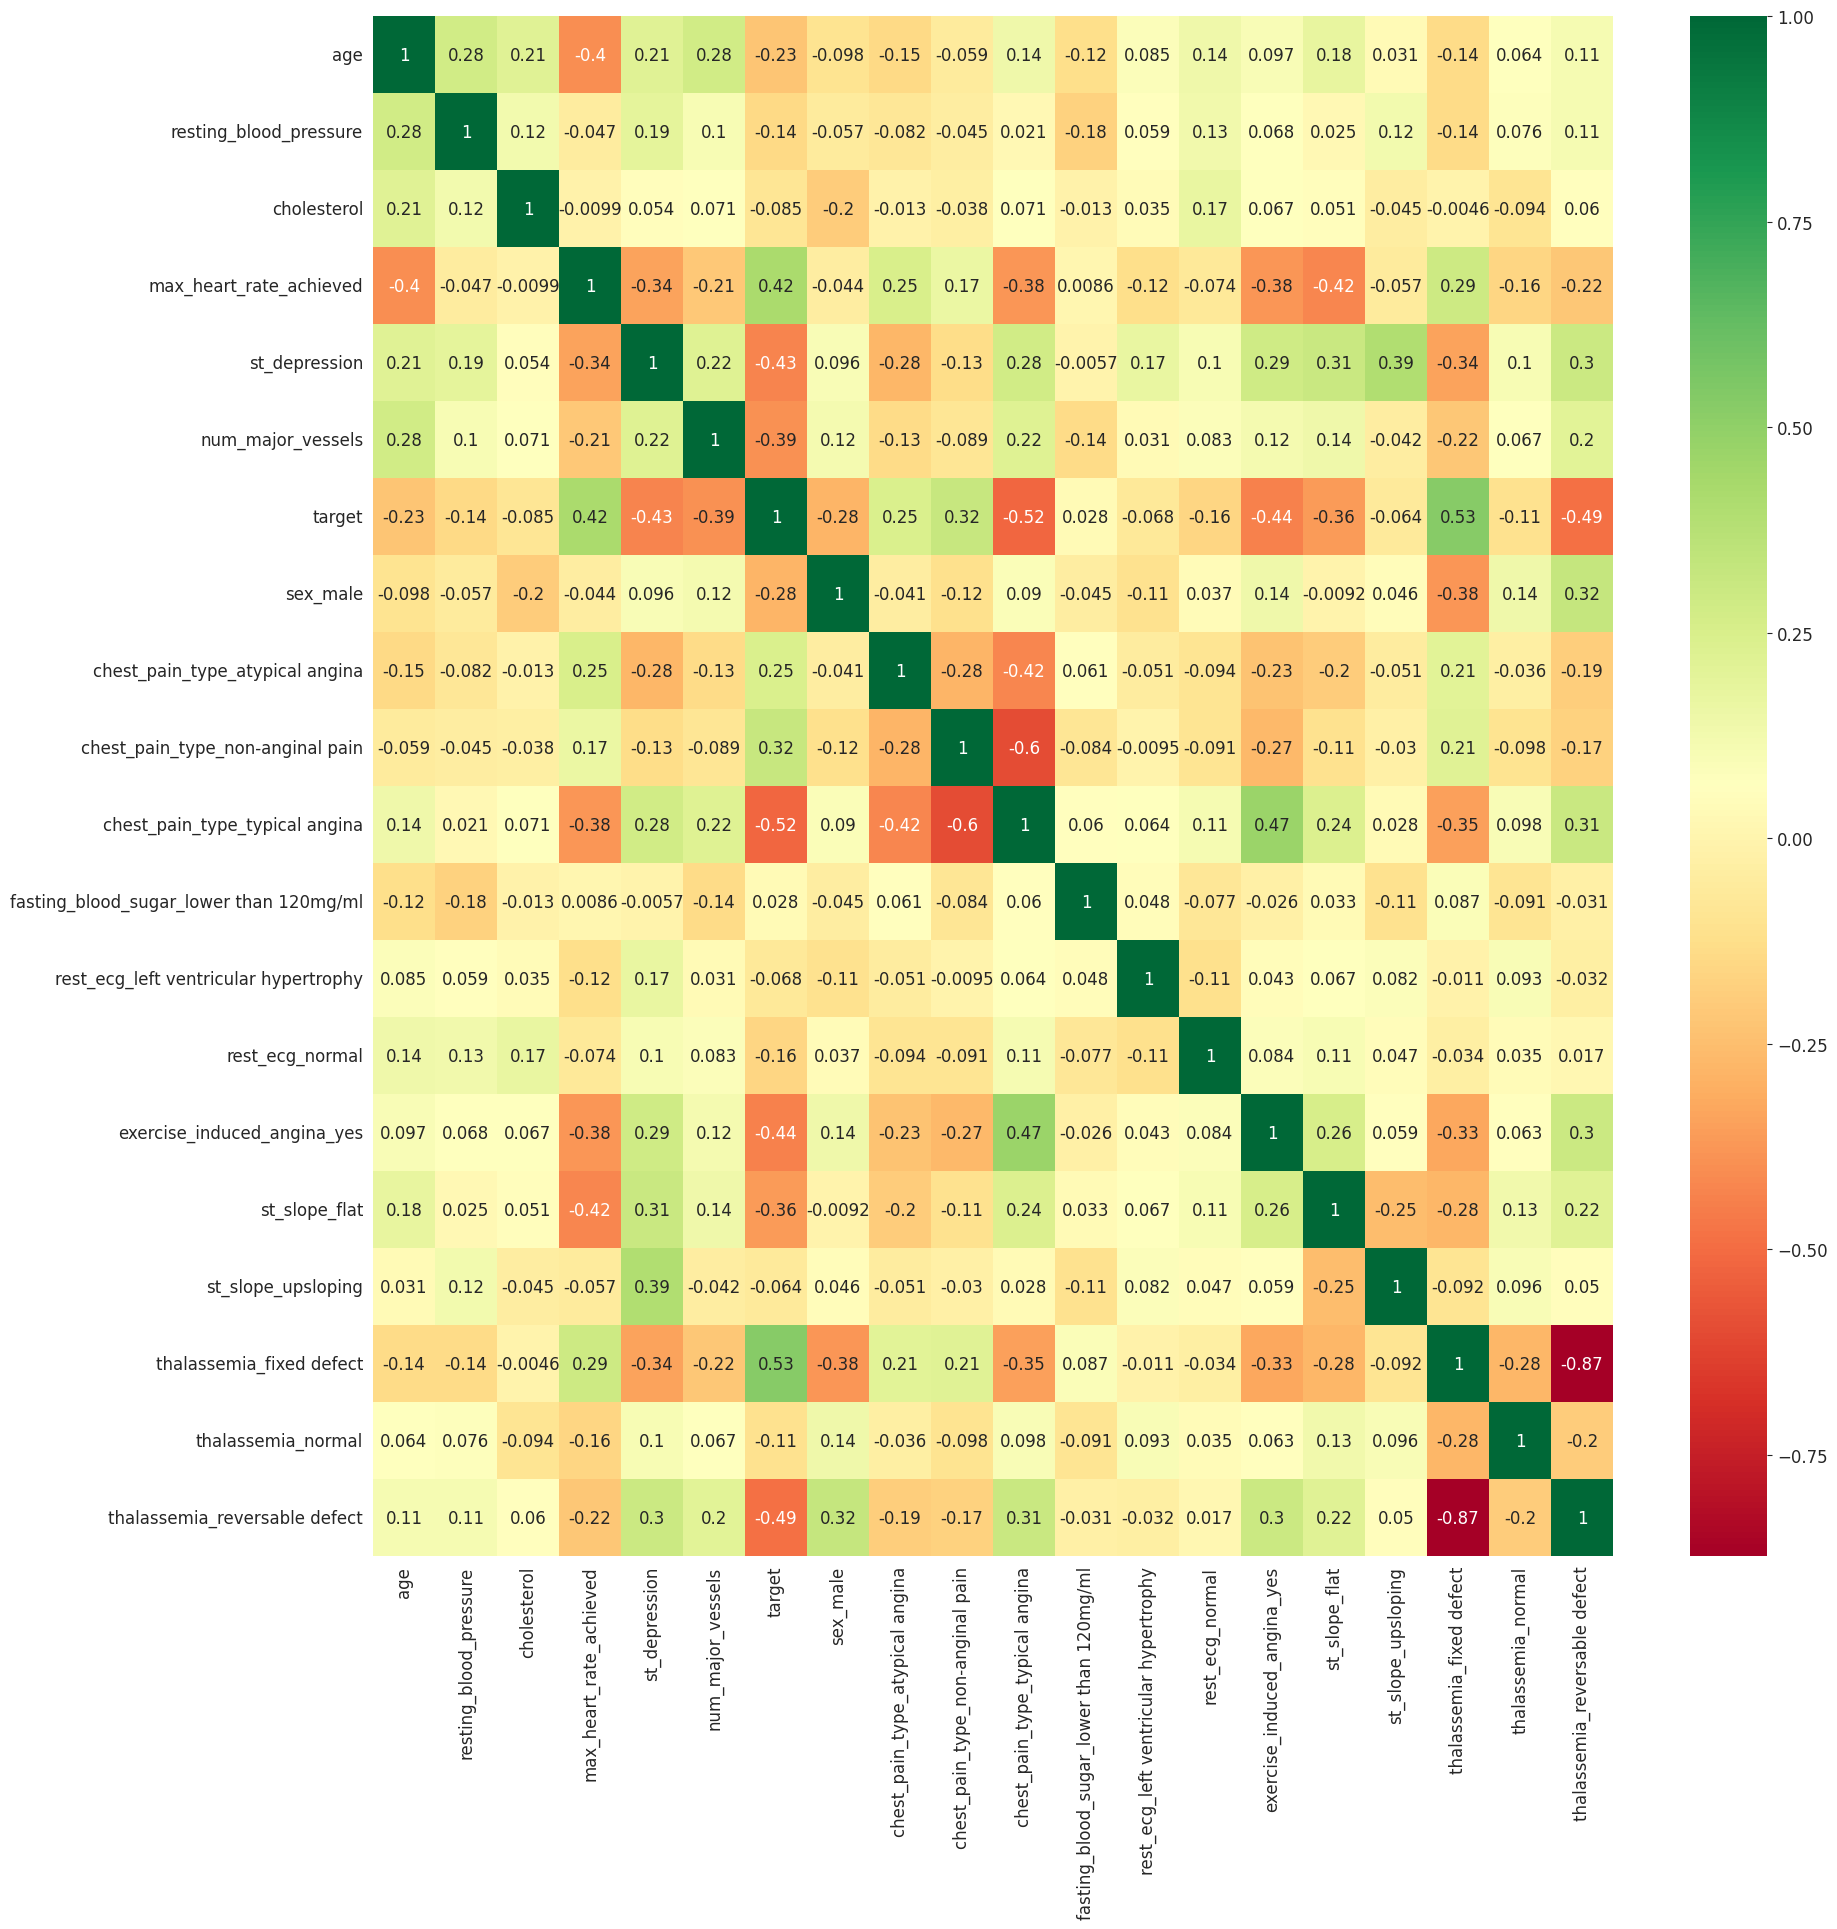

In [ ]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'resting_blood_pressure'}>,
        <Axes: title={'center': 'cholesterol'}>],
       [<Axes: title={'center': 'max_heart_rate_achieved'}>,
        <Axes: title={'center': 'st_depression'}>,
        <Axes: title={'center': 'num_major_vessels'}>],
       [<Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

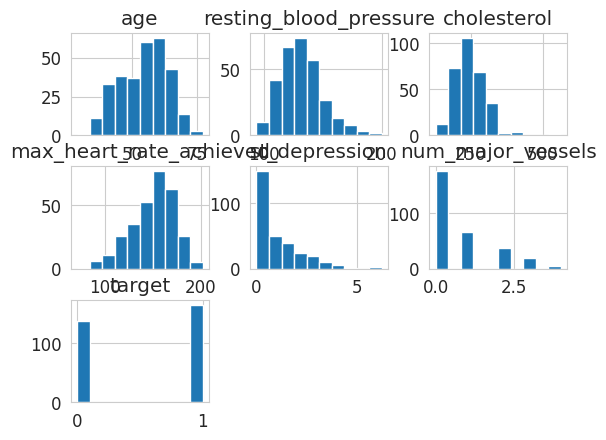

In [ ]:
dataset.hist()

<Axes: xlabel='target', ylabel='count'>

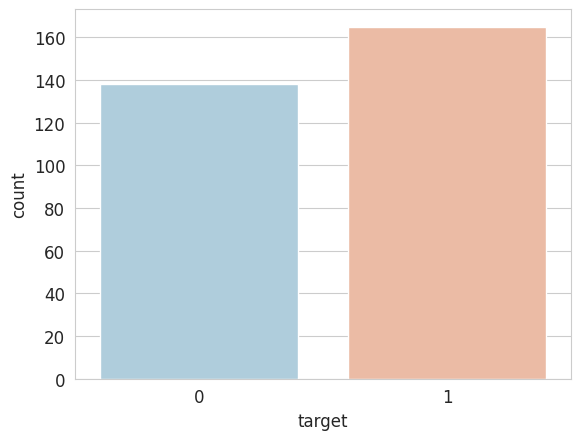

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=dataset,palette='RdBu_r')

This gives us on explainability tool. However, I can't glance at this and get a quick sense of the most important features. We'll revisit those later.



#Random Forest Classifier and Decision tree  Model




In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
from subprocess import call

# Assuming 'dataset' is already defined with your data
X = dataset.drop('target', axis=1)  # Drop 'target' column, use axis=1 for columns
y = dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)


# Decision Tree
estimator = model.estimators_[1]
feature_names = X_train.columns  # Use columns from X_train

y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'

export_graphviz(estimator, out_file='tree.dot',
                feature_names = feature_names,
                class_names = y_train_str,
                rounded = True, proportion = True,
                label='root',
                precision = 2, filled = True)

call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

Image(filename = 'tree.png')

In [ ]:
y_predict = model.predict(X_test)
y_pred_quant = model.predict_proba(X_test)[:, 1]
y_pred_bin = model.predict(X_test)

Assess the fit with a confusion matrix,

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_pred_bin)
confusion_matrix

array([[25,  4],
       [ 4, 28]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_bin)
print("Accuracy:", accuracy)
accuracy_rf = accuracy

Accuracy: 0.8688524590163934


In [ ]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred_bin)
print("Precision:", precision)

Precision: 0.875


In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred_bin)
print("F1 Score:", f1)

F1 Score: 0.875


In [ ]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score
recall = recall_score(y_test, y_pred_bin)
print("Recall:", recall)

Recall: 0.875


Diagnostic tests are often sold, marketed, cited and used with sensitivity and specificity as the headline metrics. Sensitivity and specificity are defined as,

In [ ]:
total=sum(sum(confusion_matrix))

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.8620689655172413
Specificity :  0.875


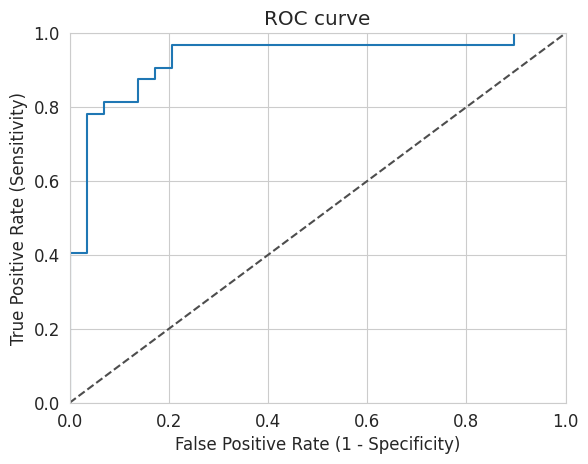

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

That seems reasonable. Let's also check with a Receiver Operator Curve (ROC),

Another common metric is the Area Under the Curve, or AUC. This is a convenient way to capture the performance of a model in a single number, although it's not without certain issues. As a rule of thumb, an AUC can be classed as follows,

0.90 - 1.00 = excellent

0.80 - 0.90 = good

0.70 - 0.80 = fair

0.60 - 0.70 = poor

0.50 - 0.60 = fail

Let's see what the above ROC gives us,

In [ ]:
auc(fpr, tpr)

0.9299568965517242

Cross Validation

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
results = {}
for metric in metrics:
  scores = cross_val_score(model, X, y, cv=cv, scoring=metric)
  results[metric] = scores

# Print the cross-validation results
for metric in metrics:
  print(f'{metric.capitalize()}: {results[metric].mean():.4f} (std: {results[metric].std():.4f})')


Accuracy: 0.8483 (std: 0.0735)
Precision: 0.8509 (std: 0.0798)
Recall: 0.8788 (std: 0.0332)
F1: 0.8672 (std: 0.0486)
Roc_auc: 0.9115 (std: 0.0428)


#Logistic regression

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [ ]:
datasetlr = pd.read_csv('/content/heart_disease_data.csv')
X_lr = datasetlr.iloc[:, 3:-1].values
y_lr = datasetlr.iloc[:, -1].values


In [ ]:
X_trainlr, X_testlr, y_trainlr, y_testlr = train_test_split(X_lr, y_lr, test_size = 0.2, random_state = 42)

In [ ]:
# Create and train the Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_trainlr, y_trainlr)


LogisticRegression()

In [ ]:
# Make predictions
y_predlr = logreg.predict(X_testlr)

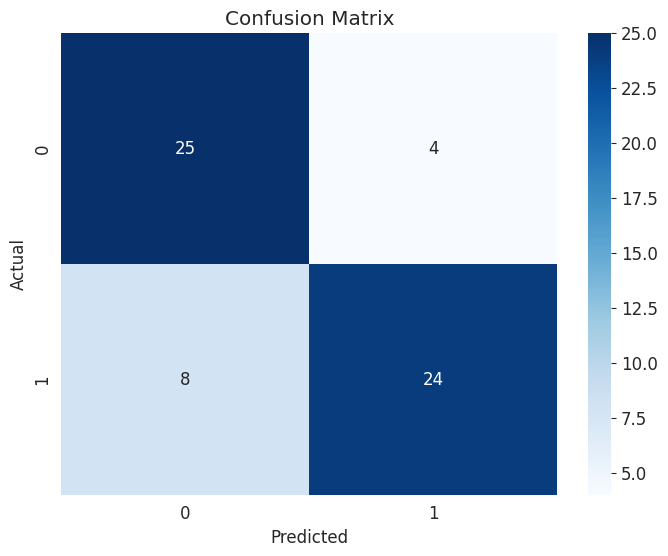

In [ ]:
# Confusion Matrix
cmlr = confusion_matrix(y_testlr, y_predlr)
plt.figure(figsize=(8, 6))
sns.heatmap(cmlr, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Calculate sensitivity
sensitivity = cmlr[0, 0] / (cmlr[0, 0] + cmlr[1, 0])
print('Sensitivity:', sensitivity)

# Calculate specificity
specificity = cmlr[1, 1] / (cmlr[1, 1] + cmlr[0, 1])
print('Specificity:', specificity)


Sensitivity: 0.7575757575757576
Specificity: 0.8571428571428571


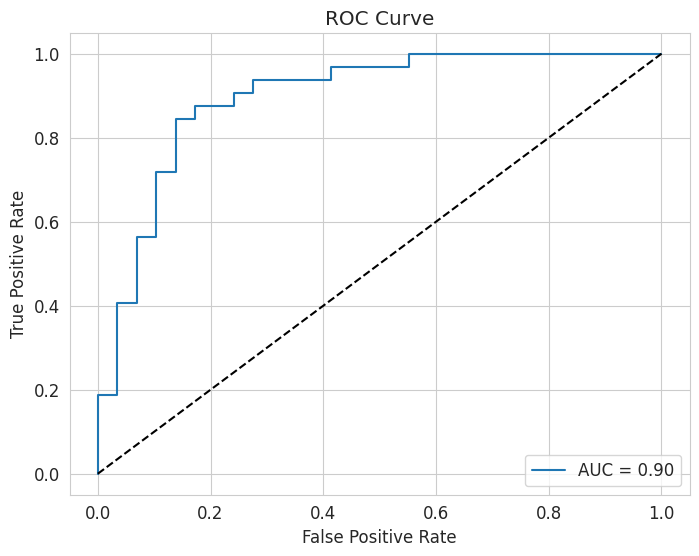

In [ ]:
# ROC Curve and AUC
y_predlr_proba = logreg.predict_proba(X_testlr)[:, 1]
y_predlr = logreg.predict(X_testlr)
y_predlr_quant = logreg.predict_proba(X_testlr)[:, 1]
fpr, tpr, thresholds = roc_curve(y_testlr, y_predlr_quant)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Calculate accuracy
accuracy = (cmlr[0, 0] + cmlr[1, 1]) / total
print('Accuracy:', accuracy)
accuracy_lr = accuracy

Accuracy: 0.8032786885245902


In [ ]:
from sklearn.metrics import precision_score

precision = precision_score(y_testlr, y_predlr)
print("Precision:", precision)

Precision: 0.8571428571428571


In [ ]:
f1 = f1_score(y_testlr, y_predlr)
print("F1 Score:", f1)

F1 Score: 0.7999999999999999


In [ ]:
from sklearn.metrics import recall_score

recall = recall_score(y_testlr, y_predlr)
print("Recall:", recall)

Recall: 0.75


In [ ]:
print(f'AUC: {roc_auc:.2f}')

AUC: 0.90


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Create a Logistic Regression model
logreg = LogisticRegression()

# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the metrics to evaluate
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
results = {}

# Perform cross-validation for each metric
for metric in metrics:
  scores = cross_val_score(logreg, X_lr, y_lr, cv=cv, scoring=metric)
  results[metric] = scores

# Print the cross-validation results
for metric in metrics:
  print(f'{metric.capitalize()}: {results[metric].mean():.4f} (std: {results[metric].std():.4f})')


Accuracy: 0.7755 (std: 0.0499)
Precision: 0.7735 (std: 0.0703)
Recall: 0.8485 (std: 0.0469)
F1: 0.8060 (std: 0.0337)
Roc_auc: 0.8652 (std: 0.0531)


#KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df1 = pd.read_csv('/content/heart_disease_data.csv')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df1.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

Feature selection

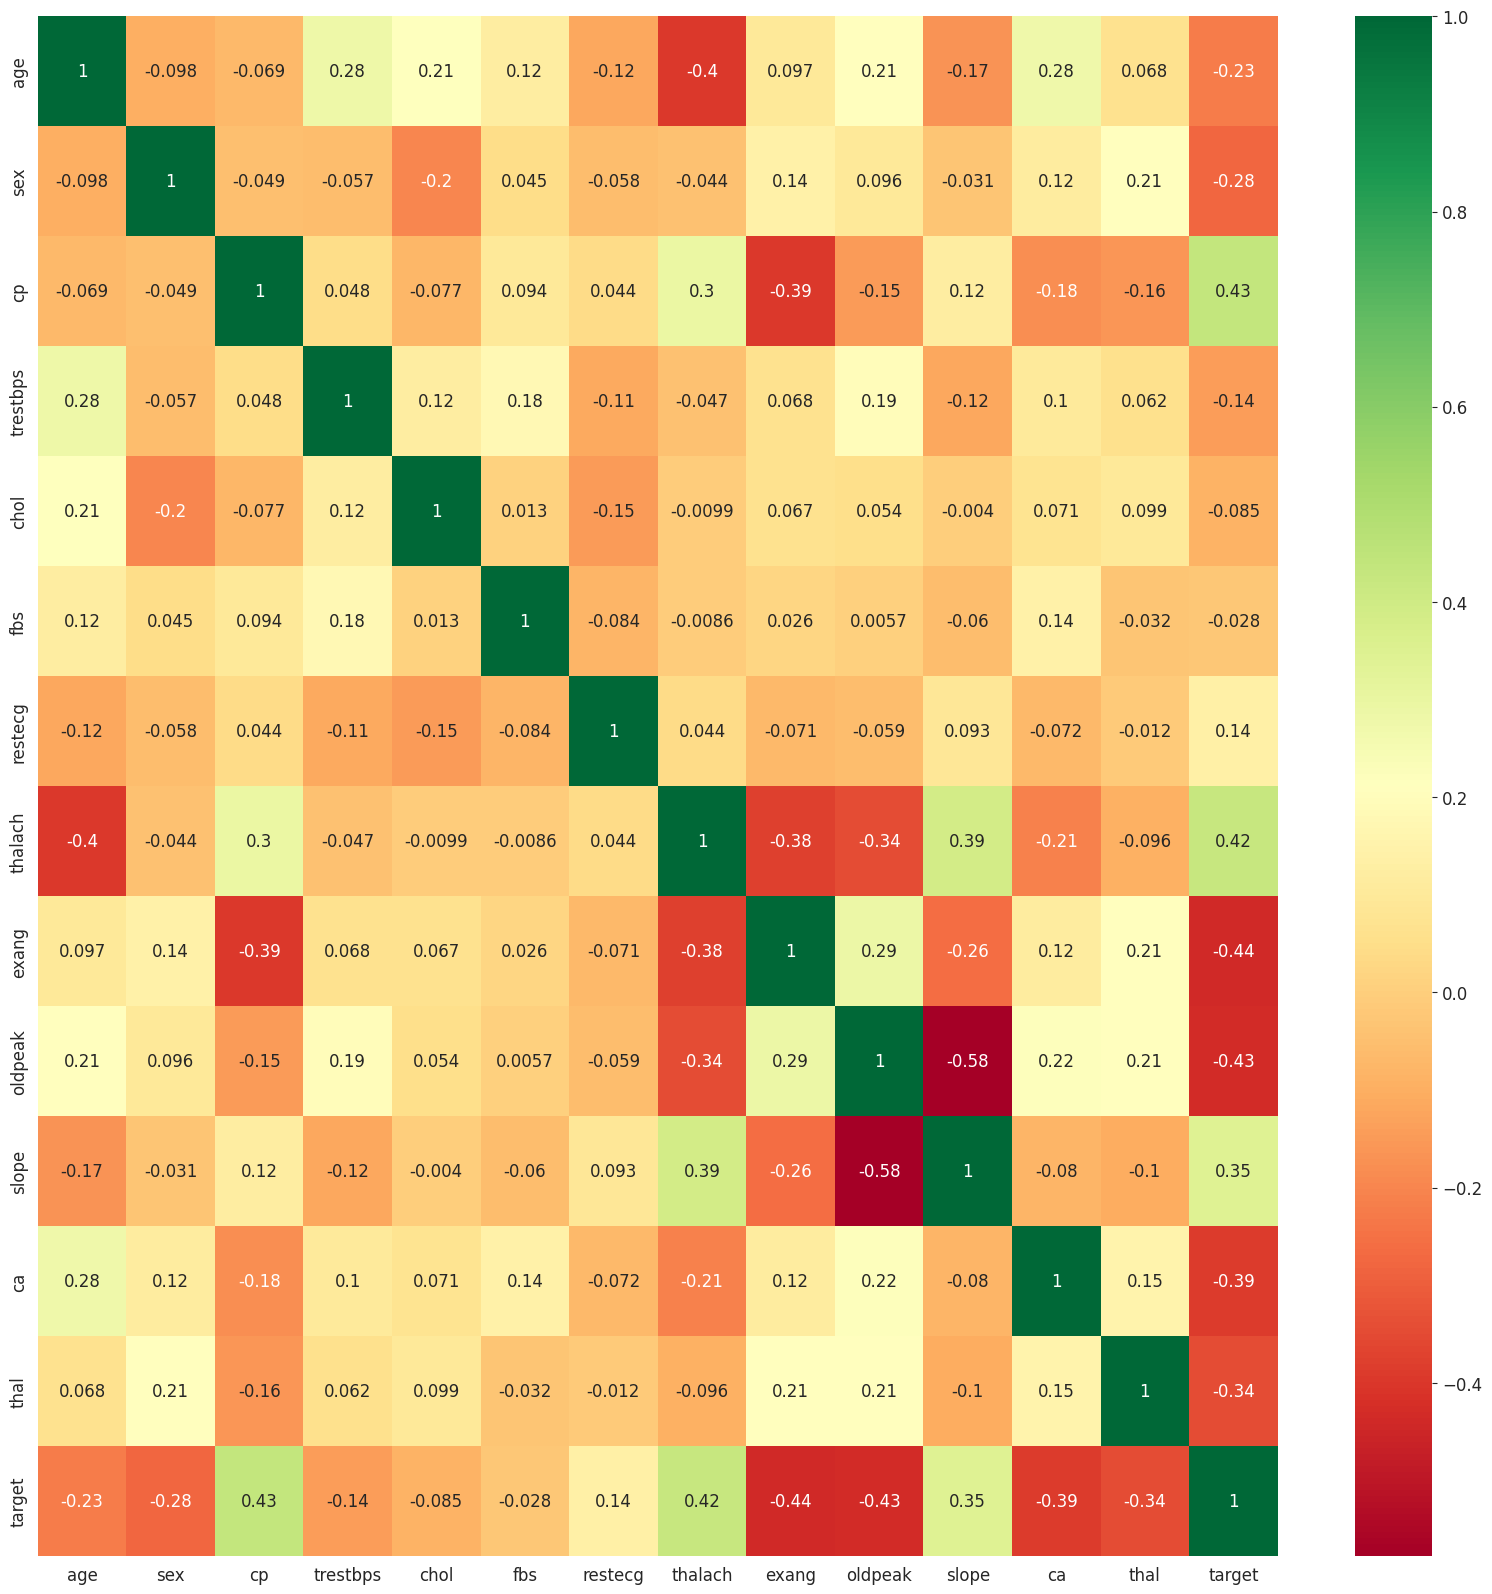

In [ ]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

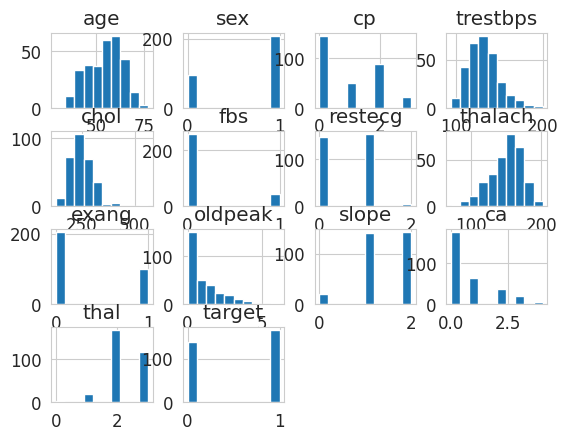

In [ ]:
df1.hist()

<Axes: xlabel='target', ylabel='count'>

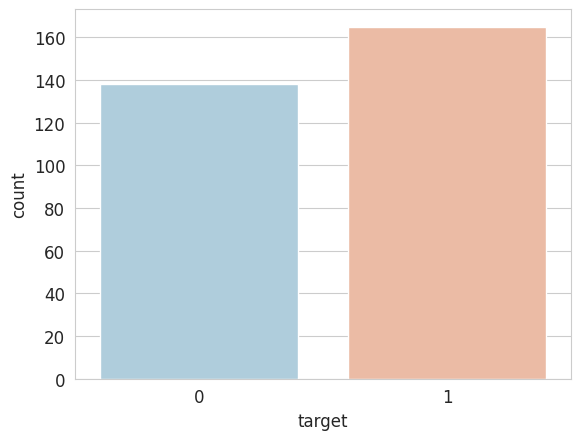

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df1,palette='RdBu_r')

Data Processing

In [ ]:
dataset1 = pd.get_dummies(df1, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset1[columns_to_scale] = standardScaler.fit_transform(dataset1[columns_to_scale])

In [ ]:
dataset1.head()

age  trestbps      chol   thalach   oldpeak  target  sex_0  sex_1  \
0  0.952197  0.763956 -0.256334  0.015443  1.087338       1  False   True   
1 -1.915313 -0.092738  0.072199  1.633471  2.122573       1  False   True   
2 -1.474158 -0.092738 -0.816773  0.977514  0.310912       1   True  False   
3  0.180175 -0.663867 -0.198357  1.239897 -0.206705       1  False   True   
4  0.290464 -0.663867  2.082050  0.583939 -0.379244       1   True  False   

    cp_0   cp_1  ...  slope_2  ca_0   ca_1   ca_2   ca_3   ca_4  thal_0  \
0  False  False  ...    False  True  False  False  False  False   False   
1  False  False  ...    False  True  False  False  False  False   False   
2  False   True  ...     True  True  False  False  False  False   False   
3  False   True  ...     True  True  False  False  False  False   False   
4   True  False  ...     True  True  False  False  False  False   False   

   thal_1  thal_2  thal_3  
0    True   False   False  
1   False    True   False  
2   False    True   False  
3   False    True   False  
4   False    True   False  

[5 rows x 31 columns]

In [ ]:
y1 = dataset1['target']
X1 = dataset1.drop(['target'], axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_trainknn, X_testknn, y_trainknn, y_testknn = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X1,y1,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

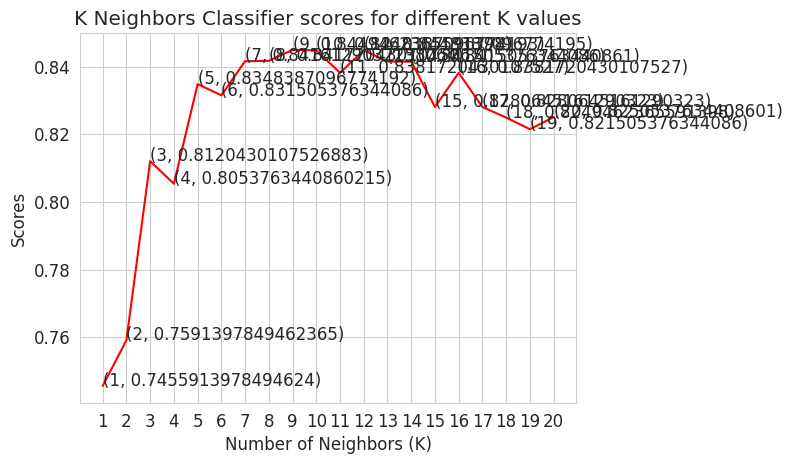

In [ ]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,X1,y1,cv=10)

In [ ]:
score.mean()
accuracy_knn = score.mean()

In [ ]:
from sklearn.metrics import precision_score

knn_classifier.fit(X_trainknn, y_trainknn)
y_pred_knn = knn_classifier.predict(X_testknn)

precision_knn = precision_score(y_testknn, y_pred_knn)
print("Precision:", precision_knn)

Precision: 0.90625


In [ ]:
f1_knn = f1_score(y_testknn, y_pred_knn)
print("F1 Score:", f1_knn)


F1 Score: 0.90625


In [ ]:
from sklearn.metrics import recall_score

recall_knn = recall_score(y_testknn, y_pred_knn)
print("Recall:", recall_knn)


Recall: 0.90625


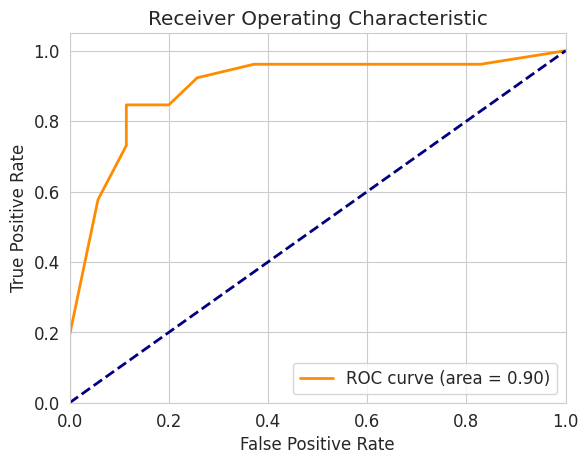

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,X1,y1,cv=10)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 10)
knn_classifier.fit(X1_train, y1_train)
y_pred_proba = knn_classifier.predict_proba(X1_test)[:,1]
fpr, tpr, thresholds = roc_curve(y1_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
auc(fpr, tpr)

0.8978021978021978

Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Create a KNN classifier with the best k value (found earlier)
knn_classifier = KNeighborsClassifier(n_neighbors=12)

# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define the metrics to evaluate
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
results = {}

# Perform cross-validation for each metric
for metric in metrics:
  if metric == 'roc_auc':
    scores = cross_val_score(knn_classifier, X1, y1, cv=cv, scoring='roc_auc')
  else:
    scores = cross_val_score(knn_classifier, X1, y1, cv=cv, scoring=metric)
  results[metric] = scores

# Print the cross-validation results
for metric in metrics:
  print(f'{metric.capitalize()}: {results[metric].mean():.4f} (std: {results[metric].std():.4f})')


Accuracy: 0.8346 (std: 0.0476)
Precision: 0.8509 (std: 0.0700)
Recall: 0.8548 (std: 0.0874)
F1: 0.8480 (std: 0.0471)
Roc_auc: 0.9033 (std: 0.0563)


#ANN

Building the ANN

In [ ]:
datasetann = pd.read_csv('/content/heart_disease_data.csv')

In [ ]:
X3 = datasetann.iloc[:, :-1].values
y3 = datasetann.iloc[:, -1].values


Initializing the ANN

In [ ]:
tf.random.set_seed(42)

In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.2, random_state = 42)

In [ ]:
ann = tf.keras.models.Sequential()

Adding the input layer and the first hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=32, activation='relu'))

Adding the second hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=32, activation='relu'))

In [ ]:
#adding dropout layer
ann.add(tf.keras.layers.Dropout(0.5))

In [ ]:
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))

In [ ]:
#adding another hidden layer
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))

In [ ]:
#adding another dropout layer
ann.add(tf.keras.layers.Dropout(0.5))

Adding the output layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

Compiling the ANN

In [ ]:
ann.compile(optimizer = 'adamW', loss = 'binary_crossentropy', metrics = ['accuracy'])

Training the ANN on the Training set

In [ ]:
ann.fit(X_train3, y_train3, batch_size = 32, epochs = 300)

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 223ms/step - accuracy: 0.5458 - loss: 8.9507
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5467 - loss: 6.8361 
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5440 - loss: 5.2711 
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5257 - loss: 4.2394 
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4369 - loss: 2.8298 
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5251 - loss: 2.1833 
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5072 - loss: 1.8124 
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5030 - loss: 1.5092 
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4867 - loss: 1.2565 
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5461 - loss: 1.0071 
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5539 - loss: 0.9171 
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5454 - lo

**Making** the predictions and evaluating the model

Predicting the Test set results

In [ ]:
y_pred3 = ann.predict(X_test3)
y_pred3 = (y_pred3 > 0.5)
# Extract NumPy arrays from Series before reshaping
print(np.concatenate((y_pred3.reshape(len(y_pred3),1), y_test.values.reshape(len(y_test3),1)),1))

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 361ms/step
[[0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]]


Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm3 = confusion_matrix(y_test3, y_pred3)
print(cm3)
print("Accuracy: {:.2f}%".format(accuracy_score(y_test3, y_pred3)*100))
accuracy_ann = accuracy_score(y_test3, y_pred3)


[[24  5]
 [ 5 27]]
Accuracy: 83.61%


In [ ]:
from sklearn.metrics import precision_score
precision = precision_score(y_test3, y_pred3)
print("Precision:", precision)

Precision: 0.84375


In [ ]:
f1 = f1_score(y_test3, y_pred3)
print("F1 Score:", f1)

F1 Score: 0.84375


In [ ]:
from sklearn.metrics import recall_score
recall = recall_score(y_test3, y_pred3)
print("Recall:", recall)


Recall: 0.84375


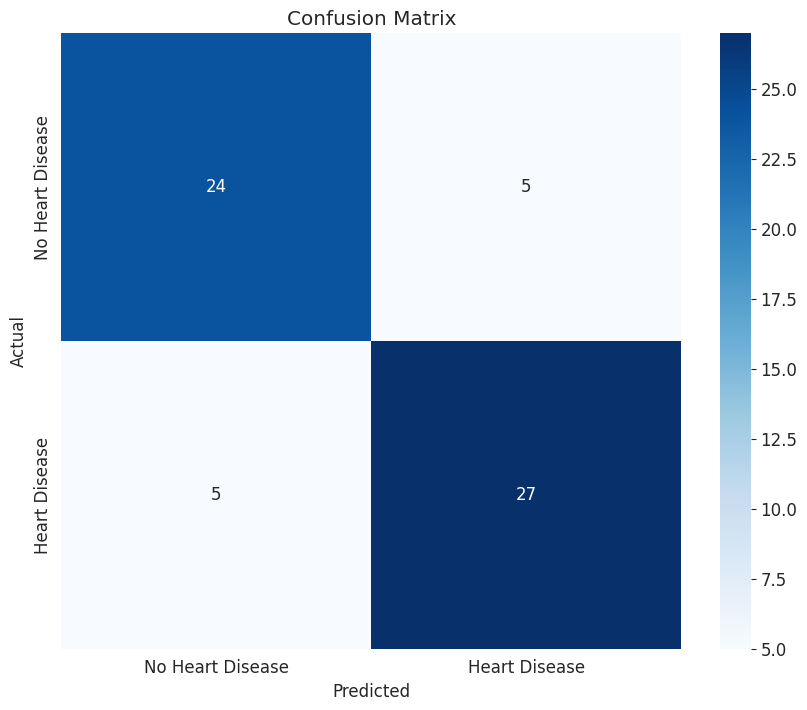

In [ ]:
import matplotlib.pyplot as plt
# Making the Confusion Matrix
cm3 = confusion_matrix(y_test3, y_pred3)

# Define the labels for the confusion matrix
labels = ['No Heart Disease', 'Heart Disease']

# Plot the confusion matrix with larger figure size and colorful visualization
plt.figure(figsize=(10, 8))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Diagnostic tests are often sold, marketed, cited and used with sensitivity and specificity as the headline metrics. Sensitivity and specificity are defined as,

Sensitivity=TruePositives/(TruePositives+FalseNegatives)

Specificity=TrueNegatives/(TrueNegatives+FalsePositives)

Let's see what this model is giving,

In [ ]:
# Sensitivity and Specificity
# Sensitivity (also called the true positive rate, the recall, or probability of detection[1] in some fields)
# measures the proportion of positives that are correctly identified as such (e.g., the percentage of sick people who are correctly identified as having the condition).

# Specificity (also called the true negative rate) measures the proportion of negatives that are correctly identified as such
# (e.g., the percentage of healthy people who are correctly identified as not having the condition).

tn, fp, fn, tp = cm3.ravel()
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)

print("Sensitivity: {:.2f}%".format(sensitivity*100))
print("Specificity: {:.2f}%".format(specificity*100))


Sensitivity: 84.38%
Specificity: 82.76%


In [ ]:
y_pred3_proba = ann.predict(X_test3)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


That seems reasonable. Let's also check with a Receiver Operator Curve (ROC),

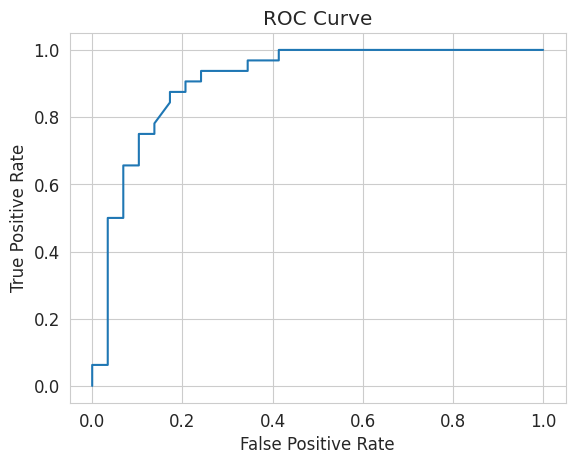

In [ ]:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

#y_test (true labels) and y_pred_proba (predicted probabilities) from ANN model
fpr, tpr, thresholds = roc_curve(y_test3, y_pred3_proba)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


Another common metric is the Area Under the Curve, or AUC. This is a convenient way to capture the performance of a model in a single number, although it's not without certain issues. As a rule of thumb, an AUC can be classed as follows,

0.90 - 1.00 = excellent

0.80 - 0.90 = good

0.70 - 0.80 = fair

0.60 - 0.70 = poor

0.50 - 0.60 = fail

Let's see what the above ROC gives us,

In [ ]:
auc(fpr, tpr)

0.9073275862068966

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the metrics to evaluate
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
results = {}

# Perform cross-validation for each metric
for metric in metrics:
  scores = []
  for train_index, test_index in cv.split(X3, y3):
    X_train3, X_test3 = X3[train_index], X3[test_index]
    y_train3, y_test3 = y3[train_index], y3[test_index]

    # Create and train the ANN model (same architecture as before)
    ann = tf.keras.models.Sequential()
    ann.add(tf.keras.layers.Dense(units=32, activation='relu'))
    ann.add(tf.keras.layers.Dense(units=32, activation='relu'))
    ann.add(tf.keras.layers.Dropout(0.5))
    ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
    ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
    ann.add(tf.keras.layers.Dropout(0.5))
    ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    ann.compile(optimizer = 'adamW', loss = 'binary_crossentropy', metrics = ['accuracy'])
    ann.fit(X_train3, y_train3, batch_size = 32, epochs = 300, verbose=0)

    # Make predictions
    y_pred3 = ann.predict(X_test3)
    y_pred3 = (y_pred3 > 0.5)

    # Calculate the score based on the current metric
    if metric == 'accuracy':
      score = accuracy_score(y_test3, y_pred3)
    elif metric == 'precision':
      score = precision_score(y_test3, y_pred3)
    elif metric == 'recall':
      score = recall_score(y_test3, y_pred3)
    elif metric == 'f1':
      score = f1_score(y_test3, y_pred3)
    elif metric == 'roc_auc':
      score = roc_auc_score(y_test3, y_pred3)

    scores.append(score)

  results[metric] = scores

# Print the cross-validation results
for metric in metrics:
  print(f'{metric.capitalize()}: {np.mean(results[metric]):.4f} (std: {np.std(results[metric]):.4f})')


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 364ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
Accuracy: 0.8051 (std: 0.0427)
Precision: 0.7877 (std: 0.0853)
R

#Stacking

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Defining the base models
estimators = [
    ('rf', model),
    ('lr', logreg),
    ('knn', knn_classifier)
]

# Define the stacking classifier
stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression()
)

# Fit the stacking model
stacking_model.fit(X_train, y_train)


StackingClassifier(estimators=[('rf', RandomForestClassifier(max_depth=5)),
                               ('lr', LogisticRegression()),
                               ('knn', KNeighborsClassifier(n_neighbors=12))],
                   final_estimator=LogisticRegression())

In [ ]:
# Make predictions
y_pred = stacking_model.predict(X_test)

In [ ]:
# Evaluate the stacking model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8852459016393442


In [ ]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print("Precision:", precision)


Precision: 0.9310344827586207


In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)


F1 Score: 0.8852459016393444


In [ ]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print("Recall:", recall)


Recall: 0.84375


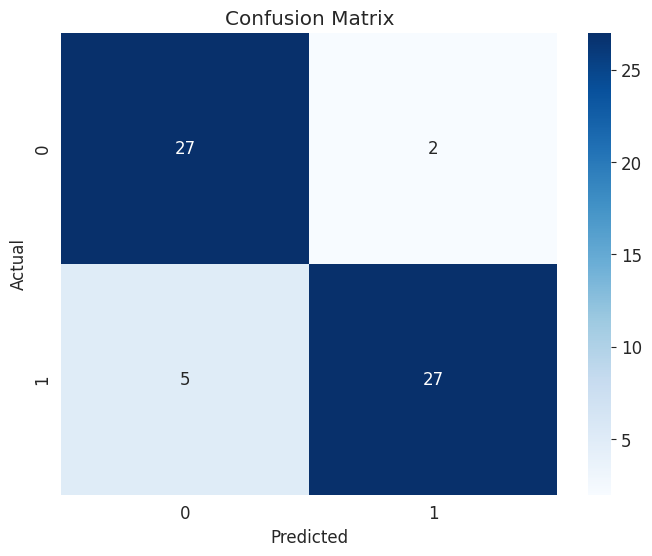

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Calculate sensitivity
sensitivity = cm[0, 0] / (cm[0, 0] + cm[1, 0])
print('Sensitivity:', sensitivity)
# Calculate specificity
specificity = cm[1, 1] / (cm[1, 1] + cm[0, 1])
print('Specificity:', specificity)

Sensitivity: 0.84375
Specificity: 0.9310344827586207


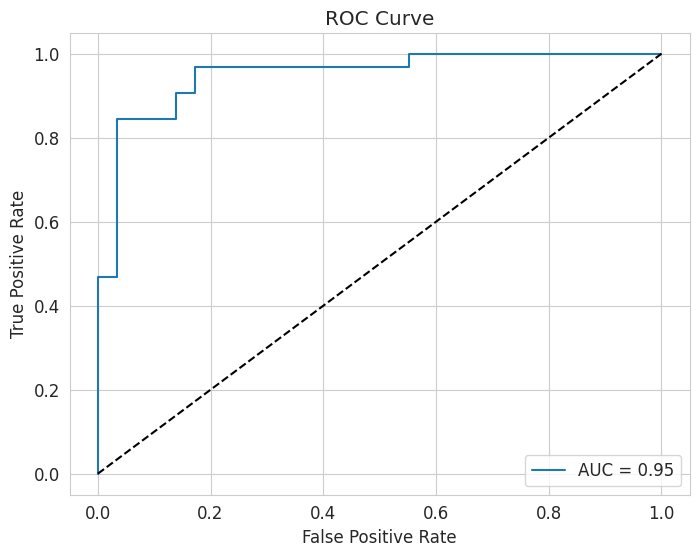

In [ ]:
# ROC Curve and AUC
y_pred_proba = stacking_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
print(f'AUC: {roc_auc:.2f}')

AUC: 0.95


In [ ]:
# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the metrics to evaluate
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
results = {}

# Perform cross-validation for each metric
for metric in metrics:
  scores = cross_val_score(stacking_model, X, y, cv=cv, scoring=metric)
  results[metric] = scores

# Print the cross-validation results
for metric in metrics:
  print(f'{metric.capitalize()}: {results[metric].mean():.4f} (std: {results[metric].std():.4f})')


Accuracy: 0.8483 (std: 0.0713)
Precision: 0.8513 (std: 0.0818)
Recall: 0.8909 (std: 0.0411)
F1: 0.8666 (std: 0.0574)
Roc_auc: 0.9085 (std: 0.0477)


Comparision of ROC curves of all the models

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


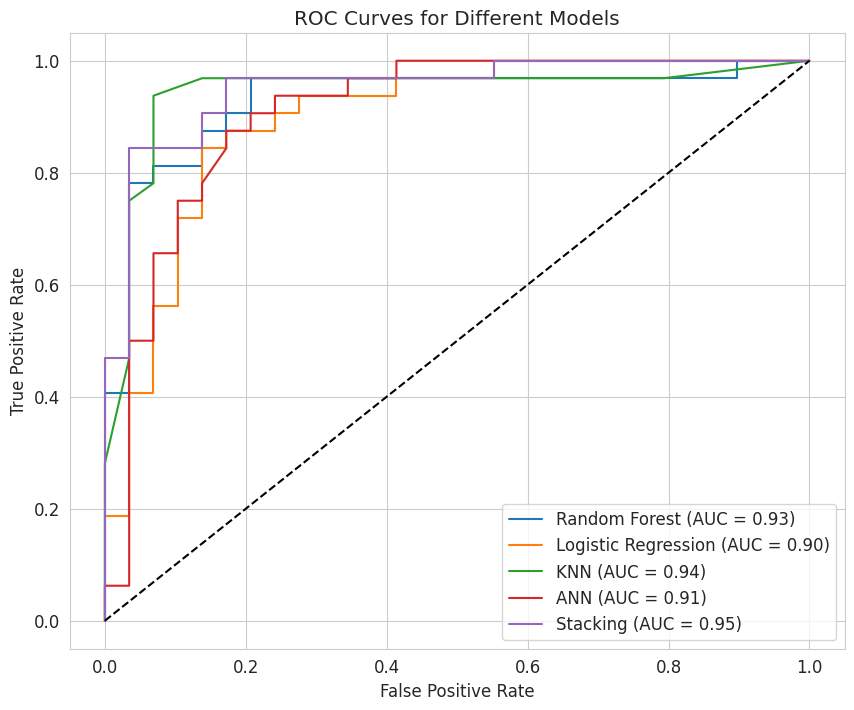

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for each model
y_pred_rf = model.predict_proba(X_test)[:, 1]
y_pred_lr = logreg.predict_proba(X_testlr)[:, 1]  # Use X_testlr for Logistic Regression
y_pred_knn = knn_classifier.predict_proba(X_testknn)[:, 1]  # Use X_testknn for KNN
y_pred_ann = ann.predict(X_test3)  # Use X_test3 for ANN
y_pred_stacking = stacking_model.predict_proba(X_test)[:, 1]

# Calculate ROC curves and AUC for each model
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_lr, tpr_lr, _ = roc_curve(y_testlr, y_pred_lr)  # Use y_testlr for Logistic Regression
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_knn, tpr_knn, _ = roc_curve(y_testknn, y_pred_knn)  # Use y_testknn for KNN
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_ann, tpr_ann, _ = roc_curve(y_test3, y_pred_ann)  # Use y_test3 for ANN
roc_auc_ann = auc(fpr_ann, tpr_ann)

fpr_stacking, tpr_stacking, _ = roc_curve(y_test, y_pred_stacking)
roc_auc_stacking = auc(fpr_stacking, tpr_stacking)

# Plot ROC curves in a single figure
plt.figure(figsize=(10, 8))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_ann, tpr_ann, label=f'ANN (AUC = {roc_auc_ann:.2f})')
plt.plot(fpr_stacking, tpr_stacking, label=f'Stacking (AUC = {roc_auc_stacking:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc='lower right')
plt.show()


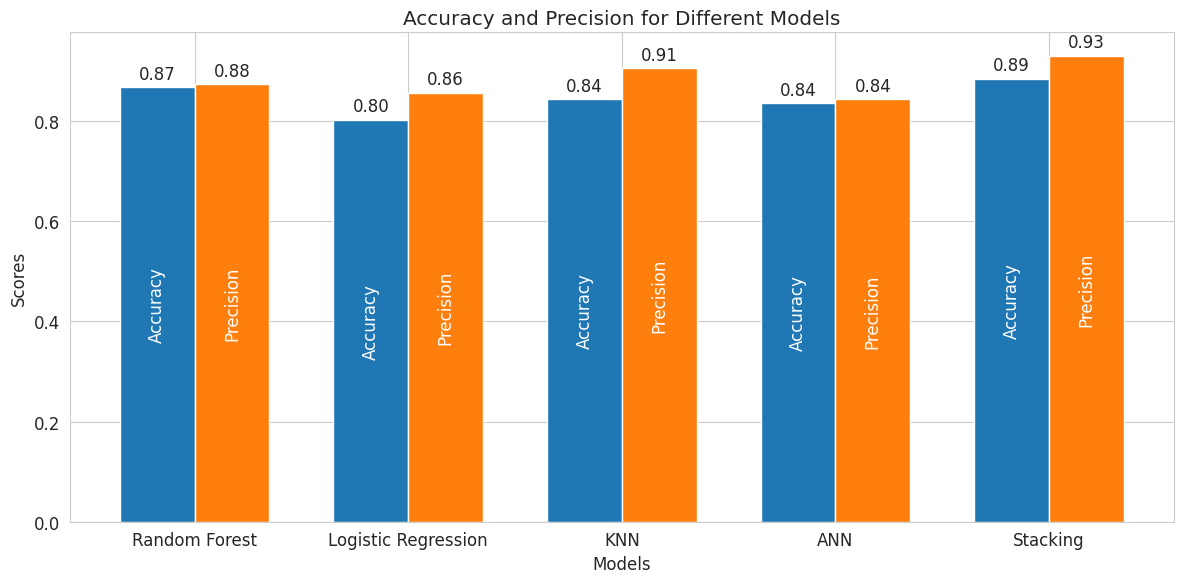

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Accuracy and precision values for each model (replace with your actual values)
accuracy_values = [accuracy_rf, accuracy_lr, accuracy_knn, accuracy_ann, accuracy]
precision_values = [precision_score(y_test, y_pred_bin), precision_score(y_testlr, y_predlr), precision_knn, precision_score(y_test3, y_pred3), precision]

# Model names
model_names = ['Random Forest', 'Logistic Regression', 'KNN', 'ANN', 'Stacking']

# Create bar positions
bar_width = 0.35
index = np.arange(len(model_names))

# Create the bar graph
fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(index, accuracy_values, bar_width, label='Accuracy')
rects2 = ax.bar(index + bar_width, precision_values, bar_width, label='Precision')

# Add labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Accuracy and Precision for Different Models')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(model_names)
ax.legend()

# Remove the indicator box
ax.legend_.remove()

# Display values on top of bars horizontally and add text inside bars vertically
def autolabel(rects, metric):
  for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
    ax.text(rect.get_x() + rect.get_width() / 2, height / 2, metric, ha='center', va='center', rotation=90, color='white')

autolabel(rects1, 'Accuracy')
autolabel(rects2, 'Precision')

plt.tight_layout()
plt.show()


#Testing the model
By giving a patient's features

In [ ]:
'def get_user_input():
  features = {
      "age": (20, 100),
      "sex": (0, 1),  # 0 for female, 1 for male
      "cp": (0, 3),  # Chest pain type (0-3)
      "trestbps": (90, 200),  # Resting blood pressure
      "chol": (100, 600),  # Serum cholesterol
      "fbs": (0, 1),  # Fasting blood sugar (0 or 1)
      "restecg": (0, 2),  # Resting electrocardiographic results (0-2)
      "thalach": (70, 200),  # Maximum heart rate achieved
      "exang": (0, 1),  # Exercise induced angina (0 or 1)
      "oldpeak": (0.0, 6.2),  # ST depression induced by exercise relative to rest
      "slope": (0, 2),  # The slope of the peak exercise ST segment (0-2)
      "ca": (0, 4),  # Number of major vessels (0-4)
      "thal": (0, 3)  # Thalassemia (0-3)
  }

  user_input = []
  for feature, (min_val, max_val) in features.items():
    while True:
      try:
        value = int(input(f"Enter {feature} ({min_val}-{max_val}): "))
        if min_val <= value <= max_val:
          user_input.append(value)
          break
        else:
          print("Invalid input. Please enter a value within the range.")
      except ValueError:
        print("Invalid input. Please enter a number.")

  return np.array(user_input).reshape(1, -1)

user_input = get_user_input()
prediction = ann.predict(user_input)
if prediction > 0.5:
  print("The patient is likely to have heart disease.")
else:
  print("The patient is unlikely to have heart disease.")


Enter age (20-100): 70
Enter sex (0-1): 1
Enter cp (0-3): 2
Enter trestbps (90-200): 120
Enter chol (100-600): 500
Enter fbs (0-1): 1
Enter restecg (0-2): 1
Enter thalach (70-200): 145
Enter exang (0-1): 1
Enter oldpeak (0.0-6.2): 4
Enter slope (0-2): 1
Enter ca (0-4): 3
Enter thal (0-3): 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step
The patient is likely to have heart disease.


In [ ]:
Future scope : i want to add noble functionalities like Risk Factor Composite Score

A weighted feature combining blood pressure, cholesterol, and age into a single risk index.

Helps the model capture interactions between clinical variables.

Lifestyle-Adjusted Metric

A feature integrating smoking, physical activity, and diet indicators into a normalized health behavior score.

Adds predictive power by quantifying lifestyle risk factors.
